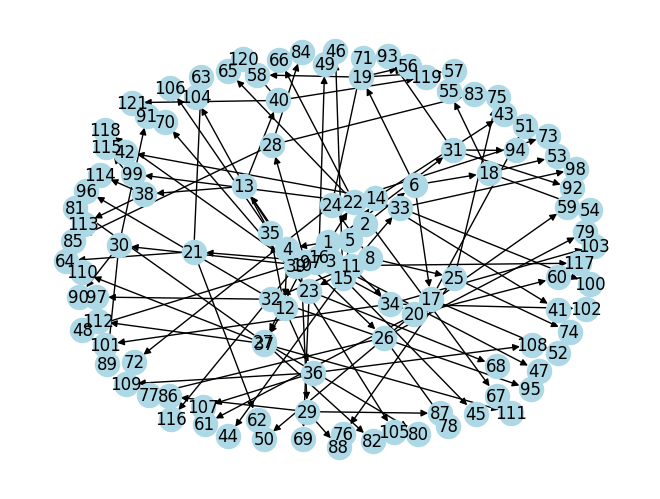

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def criar_grafo(limite):
    G = nx.DiGraph()
    for k in range(1, limite + 1):
        G.add_node(k)
        sucessores = [3 * k - 1, 3 * k, 3 * k + 1]
        for sucessor in sucessores:
            if sucessor > 0:
                G.add_edge(k, sucessor)
    return G

G = criar_grafo(40)

# Desenhar o grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue')
plt.show()

In [2]:
def bfs(grafo, inicio, objetivo):
    visitados = [inicio]
    fila = [inicio]
    while fila:
        no = fila.pop(0)
        if no == objetivo:
            return visitados
        for vizinho in grafo.successors(no):
            if vizinho not in visitados:
                visitados.append(vizinho)
                fila.append(vizinho)
    return visitados

def dfs(grafo, inicio, objetivo):
    visitados = []
    pilha = [inicio]
    while pilha:
        no = pilha.pop()
        if no not in visitados:
            visitados.append(no)
            if no == objetivo:
                return visitados
            for vizinho in grafo.successors(no):
                pilha.append(vizinho)
    return visitados

def dls(grafo, inicio, objetivo, limite):
    visitados = []
    pilha = [(inicio, 0)]
    while pilha:
        no, profundidade = pilha.pop()
        if no not in visitados:
            visitados.append(no)
            if no == objetivo:
                return visitados
            if profundidade < limite:
                for vizinho in grafo.successors(no):
                    pilha.append((vizinho, profundidade + 1))
    return visitados

def ids(grafo, inicio, objetivo, limite_max):
    for limite in range(1, limite_max + 1):
        resultado = dls(grafo, inicio, objetivo, limite)
        if objetivo in resultado:
            return resultado
    return []

# Executar os algoritmos
objetivo = 27
print("BFS:", bfs(G, 1, objetivo))
print("DFS:", dfs(G, 1, objetivo))
print("DLS (limite 3):", dls(G, 1, objetivo, 3))
print("IDS (limite max 10):", ids(G, 1, objetivo, 10))

BFS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
DFS: [1, 4, 13, 40, 121, 120, 119, 39, 118, 117, 116, 38, 115, 114, 113, 12, 37, 112, 111, 110, 36, 109, 108, 107, 35, 106, 105, 104, 11, 34, 103, 102, 101, 33, 100, 99, 98, 32, 97, 96, 95, 3, 10, 31, 94, 93, 92, 30, 91, 90, 89, 29, 88, 87, 86, 9, 28, 85, 84, 83, 27]
DLS (limite 3): [1, 4, 13, 40, 39, 38, 12, 37, 36, 35, 11, 34, 33, 32, 3, 10, 31, 30, 29, 9, 28, 27]
IDS (limite max 10): [1, 4, 13, 40, 39, 38, 12, 37, 36, 35, 11, 34, 33, 32, 3, 10, 31, 30, 29, 9, 28, 27]


In [3]:
def busca_bidirecional(grafo, inicio, objetivo):
    visitados_inicio = [inicio]
    visitados_objetivo = [objetivo]
    fila_inicio = [inicio]
    fila_objetivo = [objetivo]

    while fila_inicio and fila_objetivo:
        no_inicio = fila_inicio.pop(0)
        no_objetivo = fila_objetivo.pop(0)

        if no_inicio in visitados_objetivo:
            return visitados_inicio, visitados_objetivo
        if no_objetivo in visitados_inicio:
            return visitados_inicio, visitados_objetivo

        for vizinho in grafo.successors(no_inicio):
            if vizinho not in visitados_inicio:
                visitados_inicio.append(vizinho)
                fila_inicio.append(vizinho)

        for vizinho in grafo.predecessors(no_objetivo):
            if vizinho not in visitados_objetivo:
                visitados_objetivo.append(vizinho)
                fila_objetivo.append(vizinho)

    return [], []

visitados_inicio, visitados_objetivo = busca_bidirecional(G, 1, objetivo)
print("Busca Bidirecional (Inicio):", visitados_inicio)
print("Busca Bidirecional (Objetivo):", visitados_objetivo)

Busca Bidirecional (Inicio): [1, 2, 3, 4, 5, 6, 7]
Busca Bidirecional (Objetivo): [27, 9, 3]
